# Avocado Project:

##### STATEMENT: This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# importing dataset:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing data
df=pd.read_csv("Avacado.csv") #Reading csv file
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


Above is the data set of Avocado.And i have to build a model which predicts the average price of Avocado.So it is clear that Average Price is my target and this perticular problem is Regression Problem.

### Data description:


* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold


# EDA:

In [4]:
#Checking shape of dataset
df.shape

(18249, 14)

In [5]:
#Checking shape of dataset
df.shape

(18249, 14)

In [6]:
#Checking the data types of all columns
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

I have Date, type and region columns as object type data.Unnamed:0 and year as integer type data, and rest all columns as float type data.

In [7]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
#Checking unique values of each column
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [10]:
#Droping Unnamed column
df = df.drop(["Unnamed: 0"],axis=1)

In [11]:
#Checking null values in the dataset
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

It looks clear that i don't have any null values in my dataset.

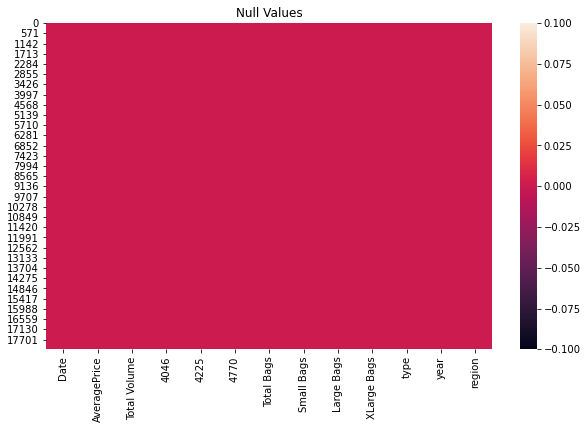

In [12]:
#Visualizeing null values
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [13]:
#Checking unique values of target column
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

Above are the unique value count of target column.

In [14]:
#Checking for empty observations
df.loc[df['AveragePrice'] == " "]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


So i don't have any empty observations in my target column.

In [15]:
#Checking value counts of target column
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

## Feature Engineering:
    
Extracting Date and month from Date column.

In [16]:
df["Date"]=pd.to_datetime(df["Date"])

In [17]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

I can observe that Date column data type has changed to datetime

In [18]:
#Extracting month from Date column
df["Month"]=df["Date"].dt.month

In [19]:
#Extracting day from Date column
df["Day"]=df["Date"].dt.day

In [20]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [21]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


## Visualization:

### Univariate Analysis:

In [22]:
continuous_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_cols = ['year', 'Day', 'Month', 'type', 'region']

Above are the two types of columns in the dataset.i.e.,Continuous columns and Categorical columns.

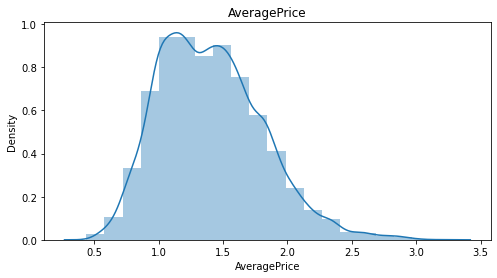

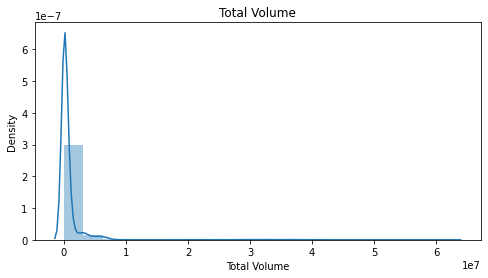

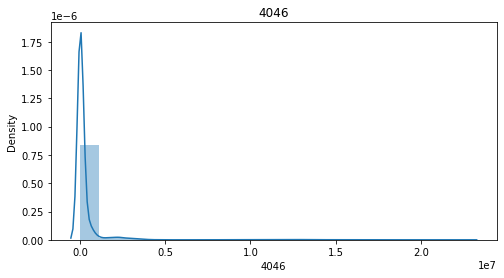

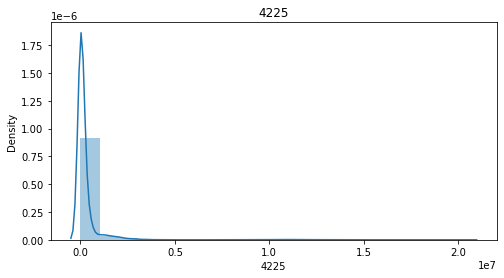

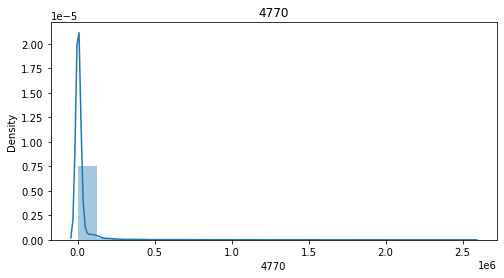

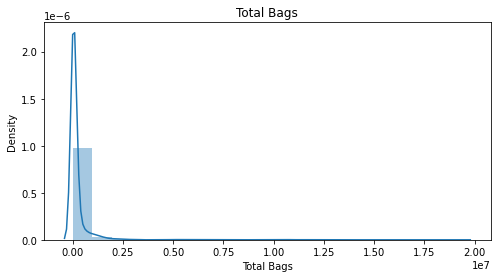

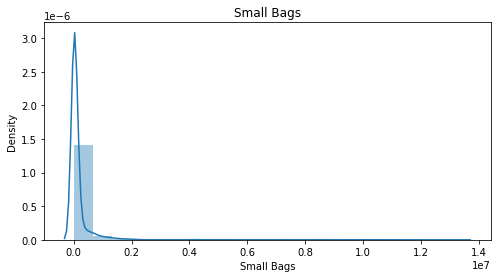

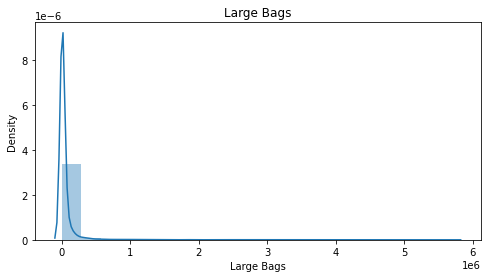

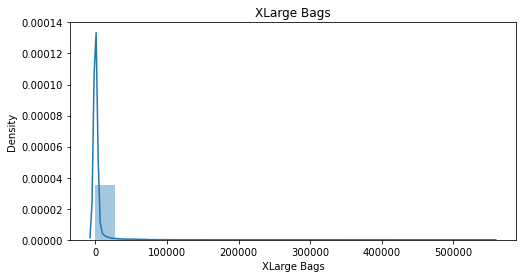

In [23]:
for i in df[continuous_cols]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 20)
    plt.title(i)
    plt.show()

In [24]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

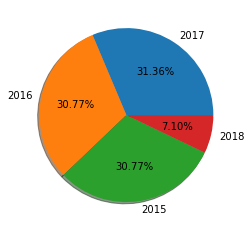

In [25]:
#Ploting pie chart for years
labels='2017','2016','2015','2018'
fig, ax = plt.subplots()
ax.pie(df['year'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

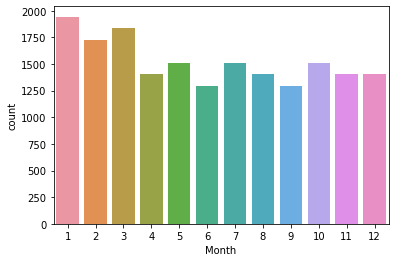

In [26]:
#Count plot for Month
sns.countplot(df['Month']);

In [27]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

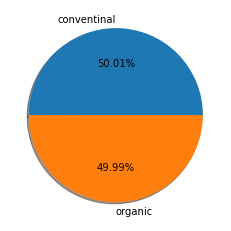

In [28]:
labels='conventinal','organic'
fig, ax = plt.subplots()
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

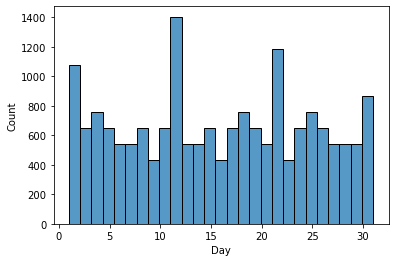

In [29]:
#Count plot for Month
sns.histplot(df['Day']);

In 1st,11th,23rd and 31st days the count is very high

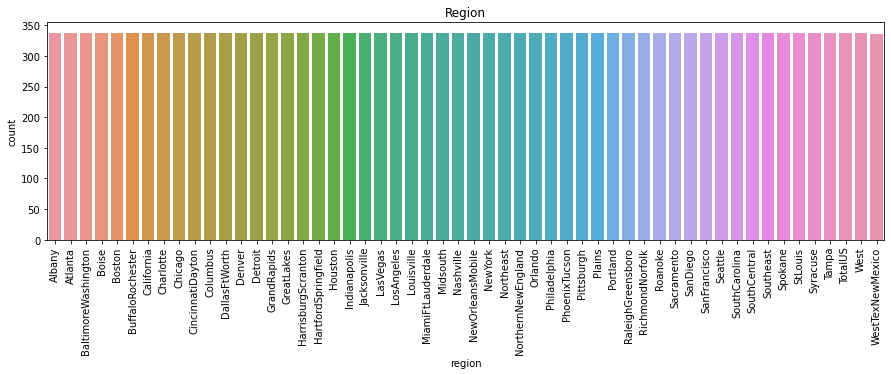

In [30]:
plt.figure(figsize=(15,4))
sns.countplot(df["region"])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()


In all the regions the count is almost same which means there is equal importance in the regions for avacado.

### Bivariate Analysis:

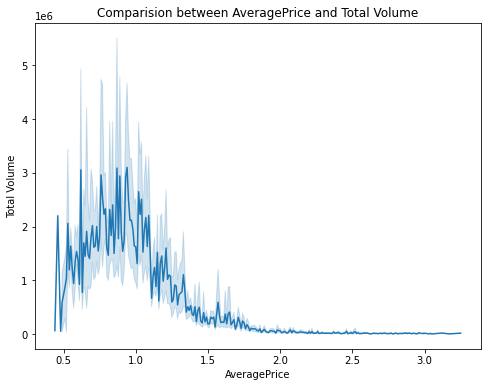

In [32]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between AveragePrice and Total Volume')
sns.lineplot(df['AveragePrice'],df['Total Volume']);

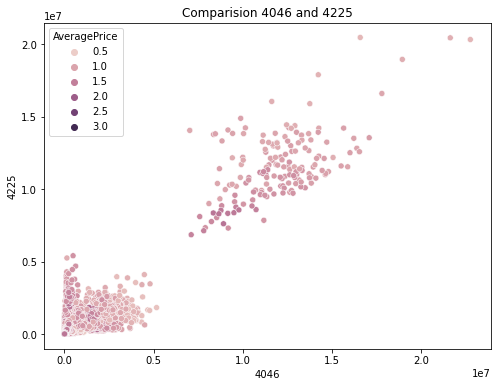

In [33]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision 4046 and 4225')
sns.scatterplot(df['4046'],df['4225'],hue=df["AveragePrice"]);

The points are dense in 0 to 0.5 for both 4046 and 4225 PLU, which means these both has less AveragePrice count.

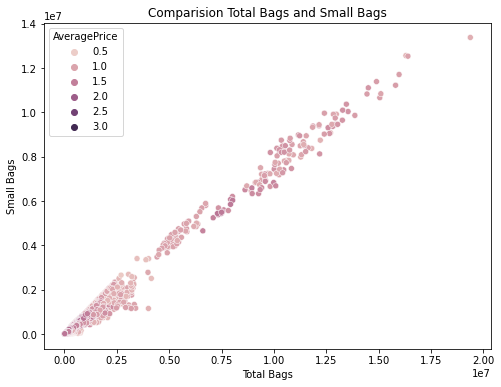

In [34]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and Small Bags')
sns.scatterplot(df['Total Bags'],df['Small Bags'],hue=df["AveragePrice"]);

I can observe a linear distribution of Total bags and Small bags.

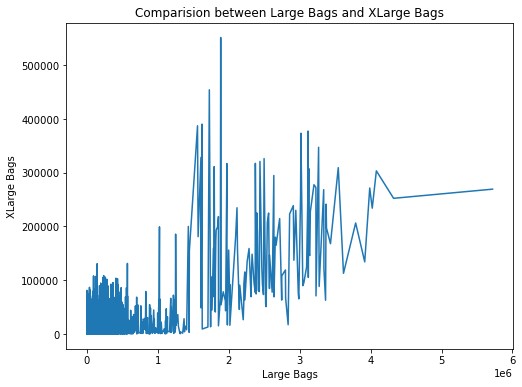

In [35]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Large Bags and XLarge Bags')
sns.lineplot(df['Large Bags'],df['XLarge Bags']);

I can observe some extreme outliers here.So i have to take care of it.

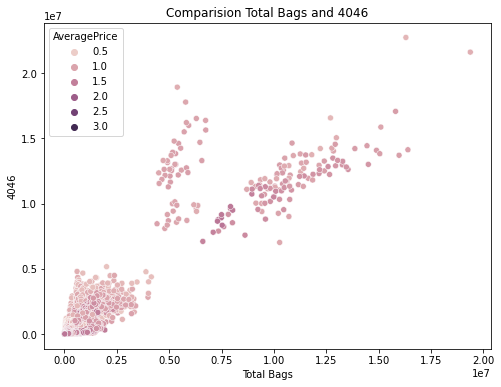

In [36]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and 4046')
sns.scatterplot(df['Total Bags'],df['4046'],hue=df["AveragePrice"]);

Above plot says that the count is more with less Total Bags and 4046 PLU.

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

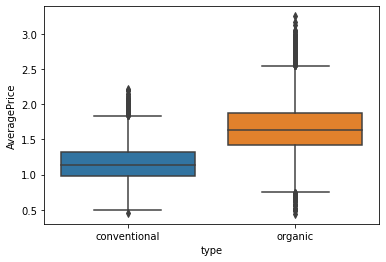

In [37]:
sns.boxplot(x='type',y='AveragePrice',data=df)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

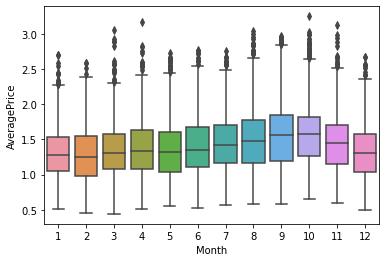

In [38]:
sns.boxplot(x='Month',y='AveragePrice',data=df)

In september the Average Price for Avacado is high.

## Multivariate Analysis:

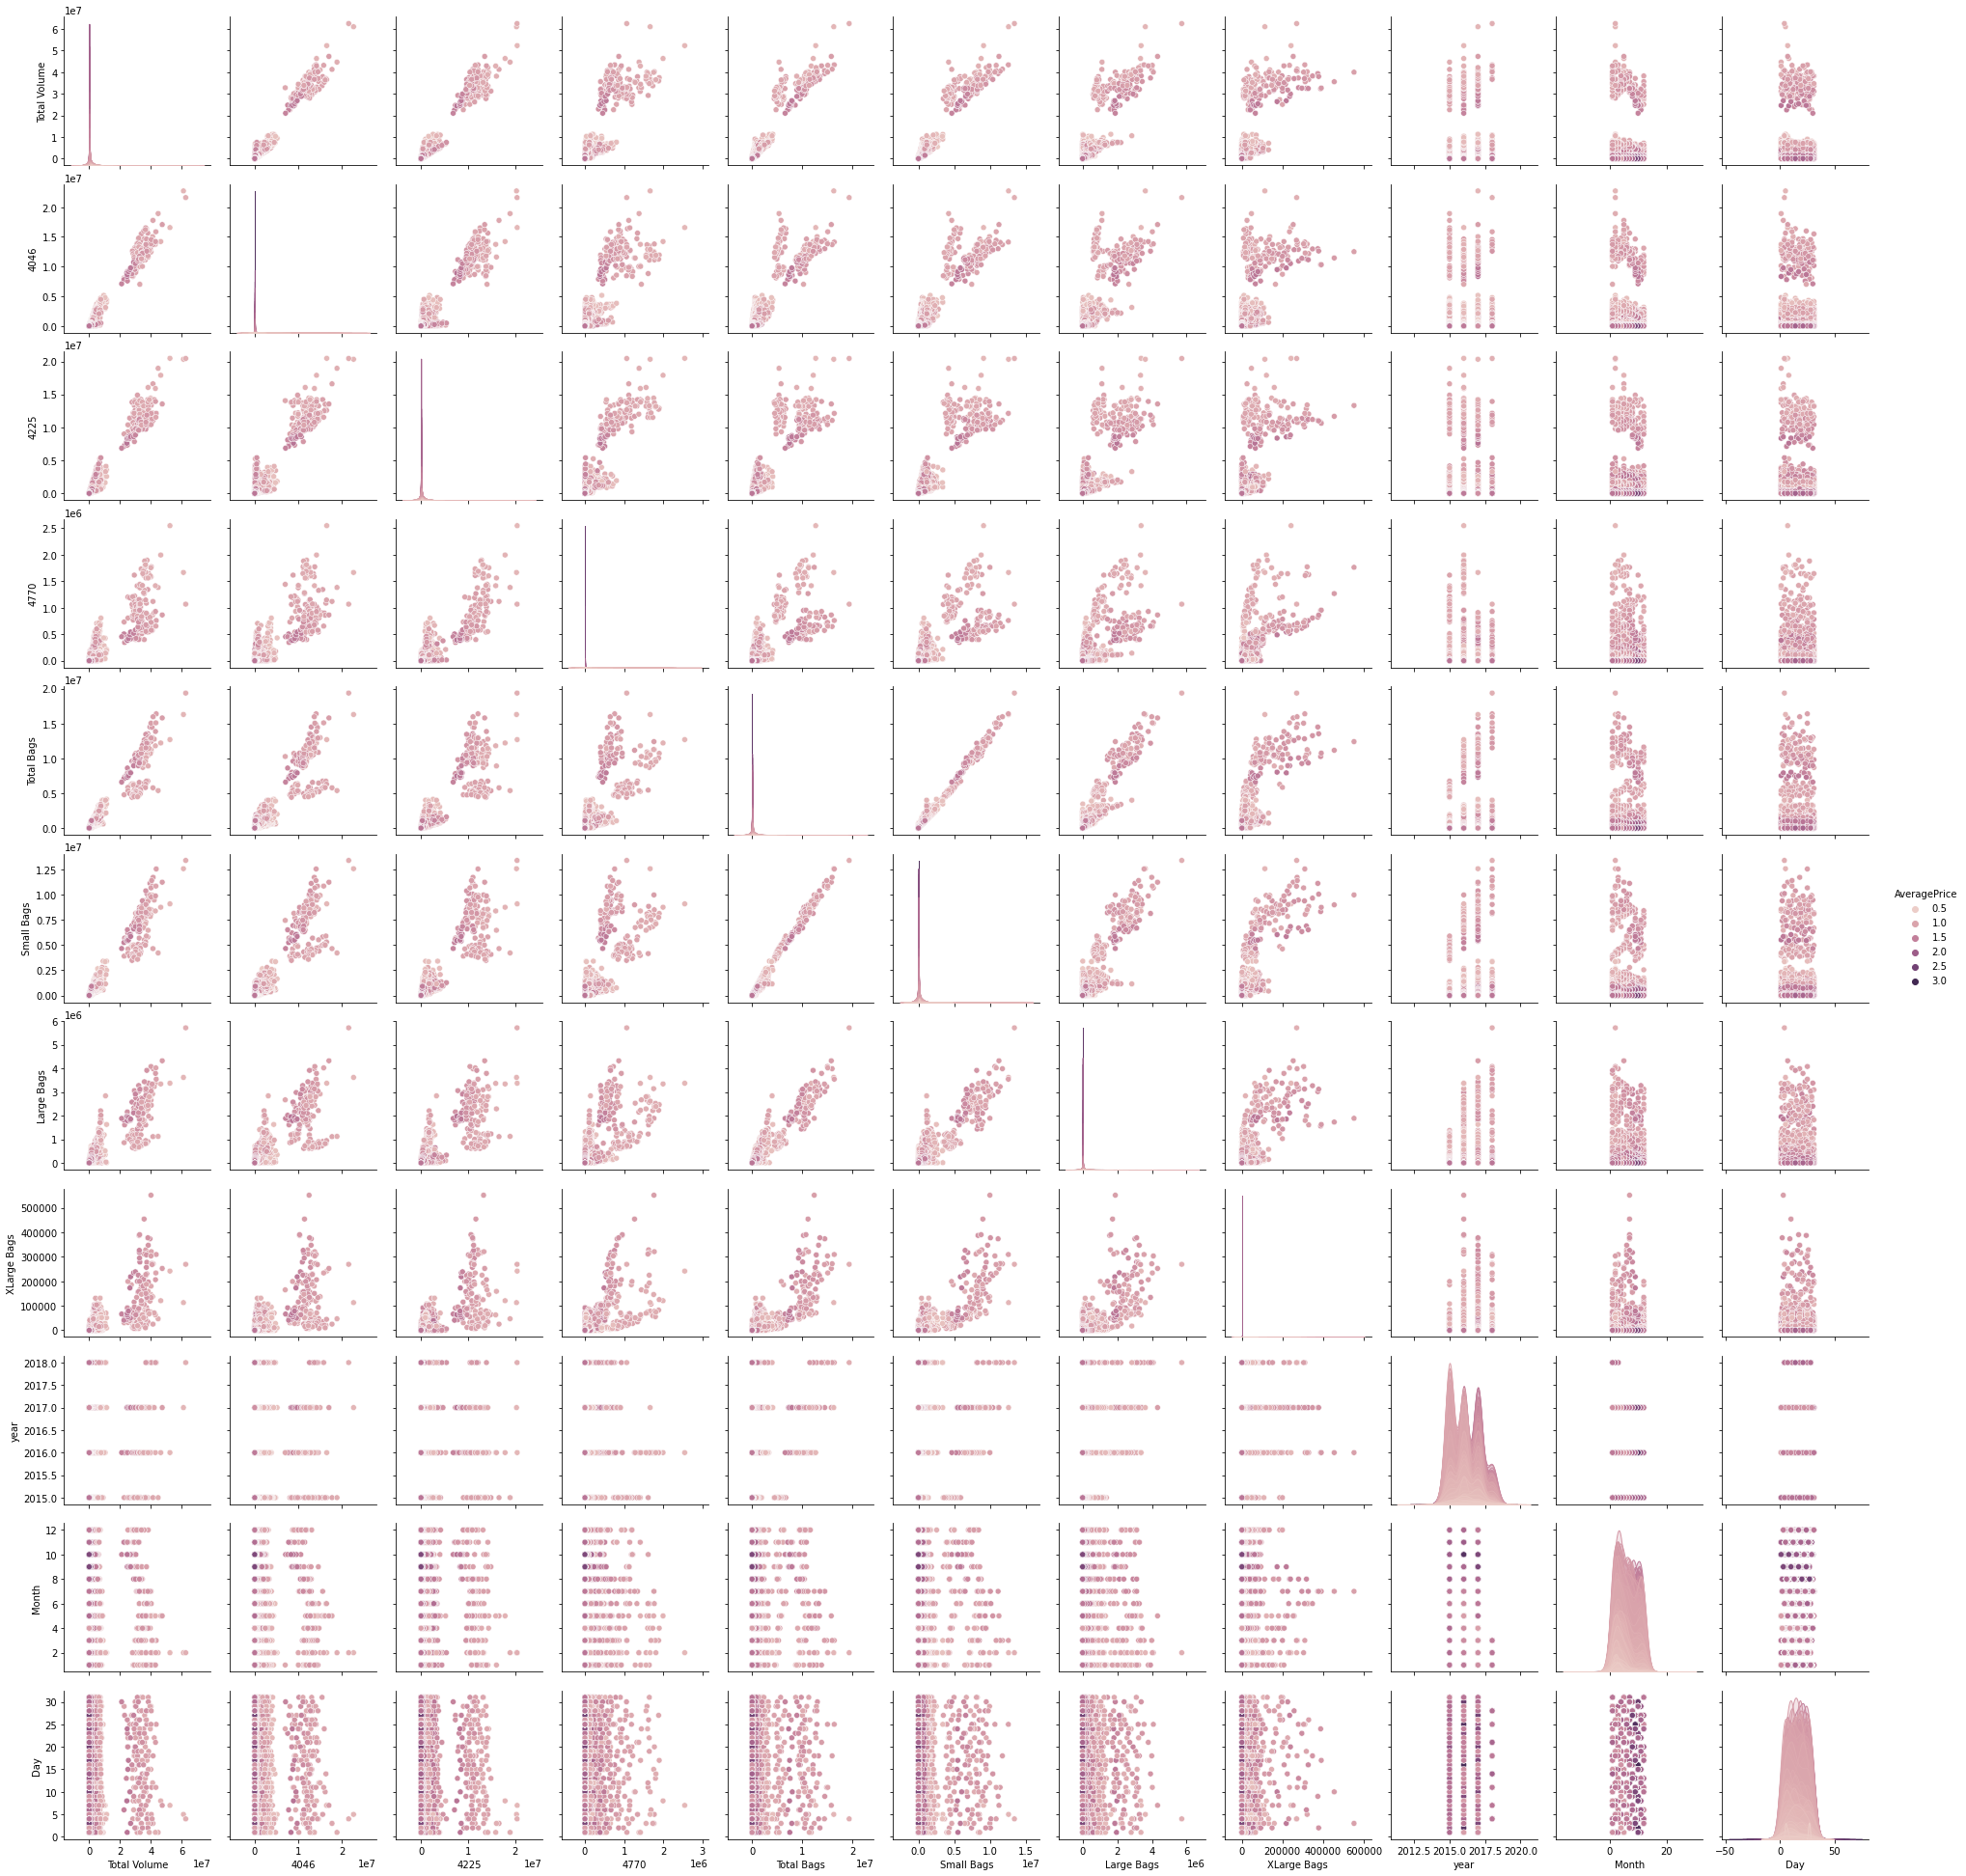

In [40]:
#pair ploting for df
sns.pairplot(df,hue="AveragePrice")

most of the pair plots are linear and also there are some outliers in some of the features.Lets have a look into that.

## Data Cleaning:

### Checking for outliers:

<AxesSubplot:>

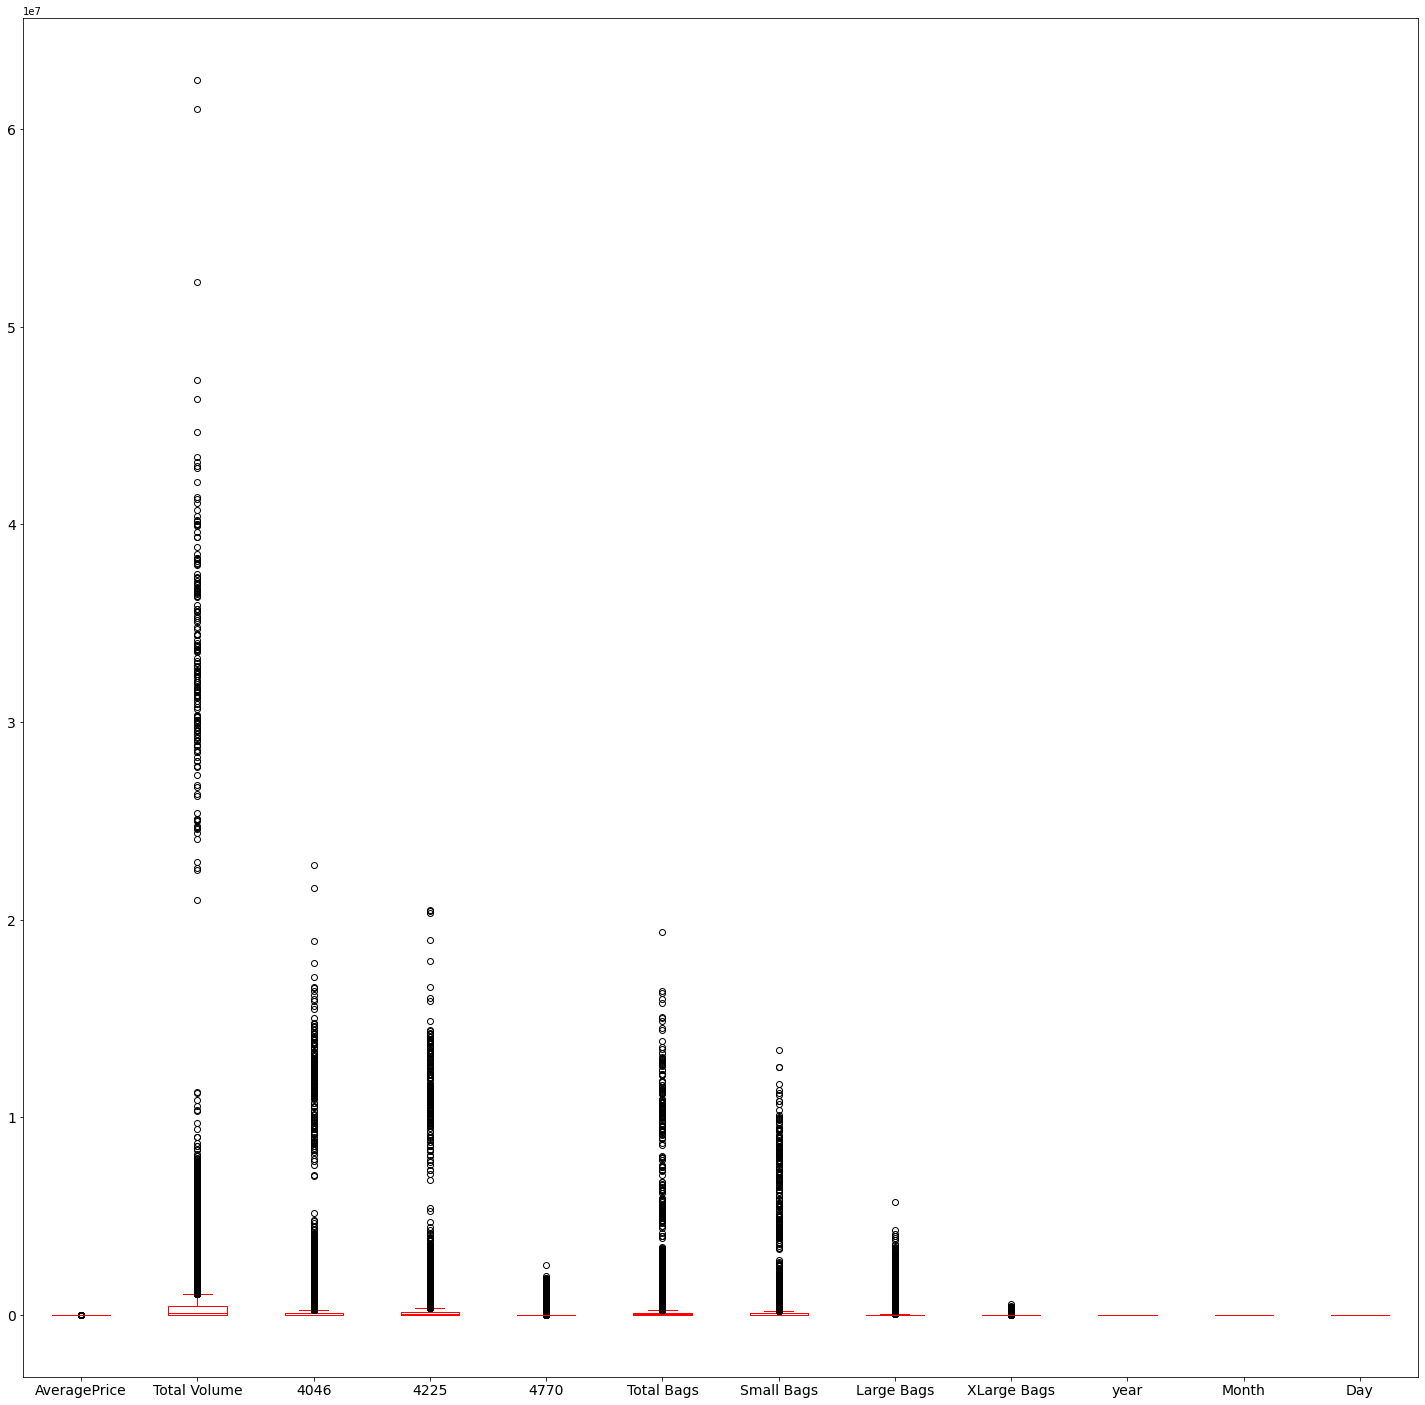

In [41]:
df.plot(kind='box',fontsize=14,figsize=(25,25),color='r')

In all the columns except year, month and day there are outliers.And these year,month,day are somehow categorical no need to check outliers for these columns.

And in all other columns i can see a huge number of outliers i have to treat them.

In my target column i have outliers but i'll not treat them as i don't want to manipulate my target column.

## Removing Outliers:

### i) Zscore method:

In [42]:
#Features having outliers
features=df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


I have removed the outliers using zscore method.

In [45]:
#Checking shape of new dataset
df_new.shape

(17782, 15)

In [46]:
#checking the old dataset
df.shape

(18249, 15)

In [47]:
#Checking dataloss
Dataloss = (((18249-17782)/18249)*100)
Dataloss

2.55904433119623

Using Zscore i have 2.56% data loss.Which is less than 10%.But still let me have a look into IQR method also.

In [81]:
df.shape

(18249, 15)

In [82]:
#Checking dataloss
Dataloss = (((18249-11747)/18249)*100)
Dataloss

35.62934955340019

In IQR method i can see a great data loss.So let me stick on to Zscore method itself.

## Checking for Skewness:

In [61]:
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

I can notice skewness in almost all columns except year, month and Day.

# Removing Skewness:

In [62]:
#list of skewed features
skew_fea=["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]

Taking all the columns with skewness as a list with variable skew_fea.

In [63]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [64]:
#Removing skewness using yeo-johnson
df_new[skew_fea] = scaler.fit_transform(df_new[skew_fea].values)

In [65]:
#Removing skewness in H using log1p
df_new["XLarge Bags"]=np.log1p(df_new["XLarge Bags"])

In [66]:
#Checking skewness after removing skewness
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

# Label Encoding:

In [67]:
cols = ["type","region"]

Taking all the categorical columns as a list cols.

In [68]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cols]= df_new[cols].apply(LE.fit_transform)

Using Label encoder to encode categorical data

In [69]:
df_new[cols].head()

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [70]:
df_new.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,0,12,27
1,2015-12-20,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,0,12,20
2,2015-12-13,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,0,12,13
3,2015-12-06,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,0,12,6
4,2015-11-29,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,0,11,29


### Correlation using heat map:

In [71]:
cor=df_new.corr()

In [72]:
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.020885,0.010991
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.005044,-0.002469


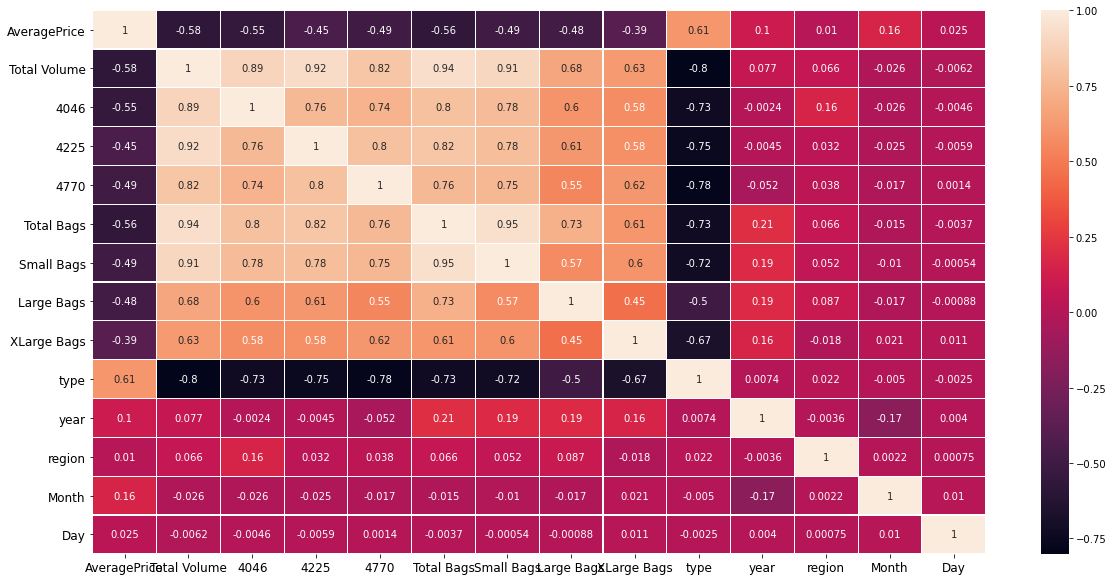

In [73]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),linewidths=.1,annot=True)
plt.yticks(rotation=0,fontsize=12);
plt.xticks(rotation=0,fontsize=12);

By looks into the heat map these are my observations on independent feature

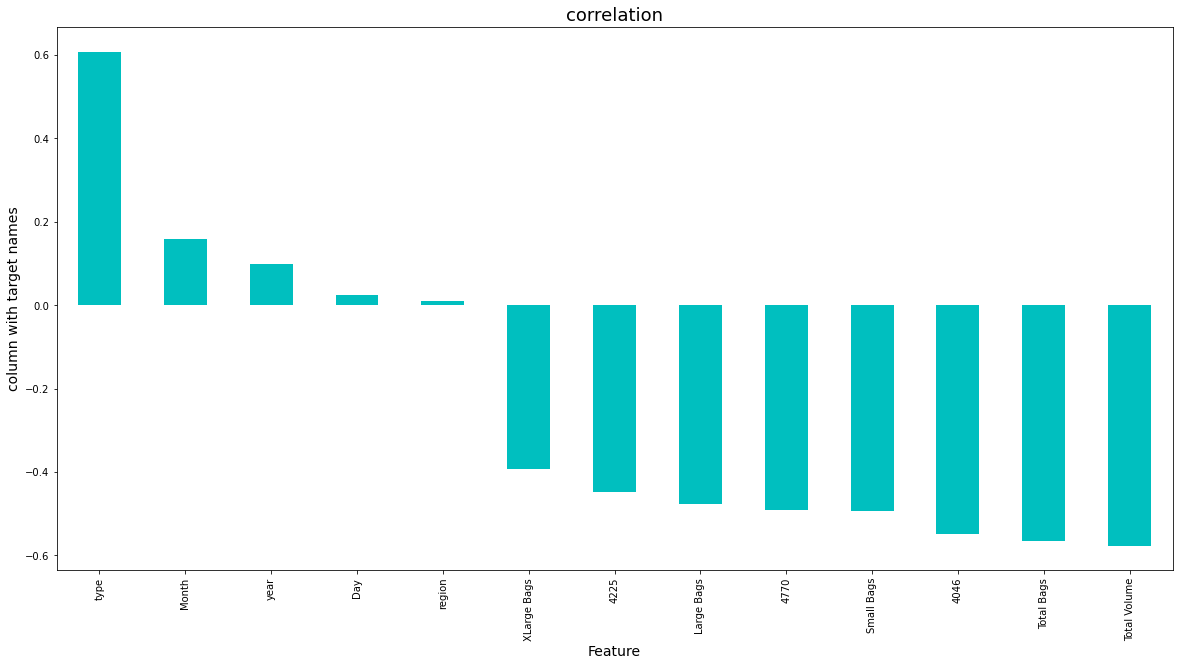

In [74]:
plt.figure(figsize=(20,10))
df_new.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [75]:
#Droping Day and region column
df_new = df_new.drop(["Day"],axis=1)
df_new = df_new.drop(["region"],axis=1)

### Preprocessing:

In [76]:
x = df_new.drop("AveragePrice",axis=1)
y = df_new["AveragePrice"]